In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving 2020-jan_nov.csv to 2020-jan_nov.csv


In [ ]:
pantanal = pd.read_csv('2020-jan_nov.csv')

In [ ]:
pantanal.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2020/06/17 17:35:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,9.0,0.0,0.7,-20.876,-57.852,16.1
1,2020/06/17 17:35:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,PORTO MURTINHO,Pantanal,6.0,0.0,0.7,-20.913,-57.653,25.7
2,2020/06/17 17:35:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,9.0,0.0,0.7,-20.875,-57.842,19.3
3,2020/06/17 17:35:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,11.0,0.0,0.7,-20.857,-57.845,18.8
4,2020/06/17 17:35:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,10.0,0.0,0.7,-20.866,-57.844,26.2


In [ ]:
pantanal.describe()

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
count,21735.000000,21735.000000,21735.000000,21823.000000,21823.000000,21665.000000
mean,21.638739,0.347076,-8.960055,-17.683047,-56.923237,93.348304
std,23.032200,2.092601,98.494698,1.221603,0.709345,156.222959
min,0.000000,0.000000,-999.000000,-22.083000,-59.153000,0.000000
25%,5.000000,0.000000,0.800000,-18.527500,-57.427000,23.700000
50%,13.000000,0.000000,1.000000,-17.273000,-57.086000,46.500000
75%,30.000000,0.000000,1.000000,-16.785000,-56.352000,97.500000
max,117.000000,67.600000,1.000000,-15.577000,-54.970000,3161.600000


In [ ]:
pantanal.sort_values(['datahora', 'estado'], axis=0, ascending=True, inplace=True)
pantanal.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
184,2020/01/02 17:30:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,2.0,0.0,0.4,-19.671,-57.242,12.8
185,2020/01/02 17:30:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,2.0,0.0,0.4,-19.670,-57.232,17.1
183,2020/01/03 18:15:00,AQUA_M-T,Brasil,MATO GROSSO,POCONE,Pantanal,0.0,0.0,0.6,-17.629,-57.331,58.6
198,2020/01/04 17:20:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,4.0,0.0,0.3,-20.339,-57.416,34.4
199,2020/01/04 17:20:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,2.0,0.0,0.2,-19.084,-57.389,21.1


In [ ]:
# Na coluna 'riscofogo' o número -999 representa valor inválido, 
# normalmente relacionado como área urbana ou corpos d'água, onde não
# faz sentido calcular o Risco de Fogo, portanto, removeremos esse valor.

df = pantanal.dropna()
df = pantanal[(pantanal.riscofogo != -999)]

df

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
184,2020/01/02 17:30:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,2.0,0.0,0.4,-19.671,-57.242,12.8
185,2020/01/02 17:30:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,2.0,0.0,0.4,-19.670,-57.232,17.1
183,2020/01/03 18:15:00,AQUA_M-T,Brasil,MATO GROSSO,POCONE,Pantanal,0.0,0.0,0.6,-17.629,-57.331,58.6
198,2020/01/04 17:20:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,4.0,0.0,0.3,-20.339,-57.416,34.4
199,2020/01/04 17:20:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,2.0,0.0,0.2,-19.084,-57.389,21.1
...,...,...,...,...,...,...,...,...,...,...,...,...
21798,2020/11/23 16:55:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,NaN,NaN,NaN,-18.256,-56.289,73.5
21801,2020/11/23 16:55:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,NaN,NaN,NaN,-18.711,-57.354,67.5
21802,2020/11/23 16:55:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,NaN,NaN,NaN,-17.664,-55.643,67.7
21807,2020/11/23 16:55:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,NaN,NaN,NaN,-18.728,-57.353,305.5


In [ ]:
df['municipio'].unique()

array(['CORUMBA', 'POCONE', 'BARAO DE MELGACO', 'CACERES',
       'PORTO ESPERIDIAO', 'NOSSA SENHORA DO LIVRAMENTO',
       'RIO VERDE DE MATO GROSSO', 'AQUIDAUANA', 'ITIQUIRA', 'SONORA',
       'PORTO MURTINHO', 'LADARIO', 'BODOQUENA', 'MIRANDA',
       'SANTO ANTONIO DO LEVERGER', 'CUIABA', 'VARZEA GRANDE',
       'JUSCIMEIRA', 'CURVELANDIA', "GLORIA D'OESTE"], dtype=object)

In [ ]:
data_municipio = df[['datahora', 'estado', 'municipio', 'diasemchuva', 'precipitacao', 
                     'riscofogo', 'latitude', 'longitude']].groupby(['datahora', 'municipio'], as_index=False).mean()
data_municipio

,datahora,municipio,diasemchuva,precipitacao,riscofogo,latitude,longitude
0,2020/01/02 17:30:00,CORUMBA,2.000000,0.0,0.400000,-19.670500,-57.237000
1,2020/01/03 18:15:00,POCONE,0.000000,0.0,0.600000,-17.629000,-57.331000
2,2020/01/04 17:20:00,CORUMBA,2.400000,0.0,0.340000,-18.484800,-56.456200
3,2020/01/05 18:00:00,CORUMBA,4.166667,0.0,0.266667,-19.239500,-57.430667
4,2020/01/05 18:00:00,POCONE,3.000000,0.0,0.400000,-17.749000,-57.298500
...,...,...,...,...,...,...,...
1095,2020/11/21 17:05:00,SANTO ANTONIO DO LEVERGER,2.000000,0.0,0.300000,-16.223000,-55.795000
1096,2020/11/22 17:50:00,CORUMBA,4.000000,0.0,0.300000,-17.923667,-57.086333
1097,2020/11/22 17:50:00,POCONE,4.000000,0.0,0.472727,-17.001091,-57.200636
1098,2020/11/23 16:55:00,CORUMBA,NaN,NaN,NaN,-18.468667,-56.898333


In [ ]:
group_municipio = df[['municipio', 'diasemchuva', 'precipitacao', 'riscofogo']].groupby(['municipio'], as_index=False).mean()
group_municipio

,municipio,diasemchuva,precipitacao,riscofogo
0,AQUIDAUANA,10.953191,0.446809,0.790213
1,BARAO DE MELGACO,39.985726,0.092755,0.983867
2,BODOQUENA,8.000000,0.000000,0.500000
3,CACERES,15.925724,0.433949,0.877423
4,CORUMBA,13.473980,0.423304,0.732487
5,CUIABA,30.625000,0.187500,0.887500
6,CURVELANDIA,5.250000,0.000000,0.875000
7,GLORIA D'OESTE,11.000000,0.000000,0.950000
8,ITIQUIRA,1.753425,2.831507,0.589041
9,JUSCIMEIRA,103.000000,0.000000,1.000000


**Teste da separação de data-hora:**

In [ ]:
teste = '2020/10/25 17:25:00'
import datetime

string = "19 Nov 2015  18:45:00.000"
date = datetime.datetime.strptime(teste, "%Y/%m/%d  %H:%M:%S")

print(date)
print(date.year)
print(date.month)
print(date.day)

2020-10-25 17:25:00
2020
10
25


In [ ]:
data_municipio['datahora'] = pd.to_datetime(data_municipio['datahora'])
data_municipio

,datahora,municipio,diasemchuva,precipitacao,riscofogo,latitude,longitude
0,2020-01-02 17:30:00,CORUMBA,2.000000,0.0,0.400000,-19.670500,-57.237000
1,2020-01-03 18:15:00,POCONE,0.000000,0.0,0.600000,-17.629000,-57.331000
2,2020-01-04 17:20:00,CORUMBA,2.400000,0.0,0.340000,-18.484800,-56.456200
3,2020-01-05 18:00:00,CORUMBA,4.166667,0.0,0.266667,-19.239500,-57.430667
4,2020-01-05 18:00:00,POCONE,3.000000,0.0,0.400000,-17.749000,-57.298500
...,...,...,...,...,...,...,...
1095,2020-11-21 17:05:00,SANTO ANTONIO DO LEVERGER,2.000000,0.0,0.300000,-16.223000,-55.795000
1096,2020-11-22 17:50:00,CORUMBA,4.000000,0.0,0.300000,-17.923667,-57.086333
1097,2020-11-22 17:50:00,POCONE,4.000000,0.0,0.472727,-17.001091,-57.200636
1098,2020-11-23 16:55:00,CORUMBA,NaN,NaN,NaN,-18.468667,-56.898333


In [ ]:
# Separando dia, mês e ano por colunas

data_municipio['dia'] = data_municipio['datahora'].dt.day
data_municipio['mês'] = data_municipio['datahora'].dt.month
data_municipio['ano'] = data_municipio['datahora'].dt.year
data_municipio

,datahora,municipio,diasemchuva,precipitacao,riscofogo,latitude,longitude,dia,mês,ano
0,2020-01-02 17:30:00,CORUMBA,2.000000,0.0,0.400000,-19.670500,-57.237000,2,1,2020
1,2020-01-03 18:15:00,POCONE,0.000000,0.0,0.600000,-17.629000,-57.331000,3,1,2020
2,2020-01-04 17:20:00,CORUMBA,2.400000,0.0,0.340000,-18.484800,-56.456200,4,1,2020
3,2020-01-05 18:00:00,CORUMBA,4.166667,0.0,0.266667,-19.239500,-57.430667,5,1,2020
4,2020-01-05 18:00:00,POCONE,3.000000,0.0,0.400000,-17.749000,-57.298500,5,1,2020
...,...,...,...,...,...,...,...,...,...,...
1095,2020-11-21 17:05:00,SANTO ANTONIO DO LEVERGER,2.000000,0.0,0.300000,-16.223000,-55.795000,21,11,2020
1096,2020-11-22 17:50:00,CORUMBA,4.000000,0.0,0.300000,-17.923667,-57.086333,22,11,2020
1097,2020-11-22 17:50:00,POCONE,4.000000,0.0,0.472727,-17.001091,-57.200636,22,11,2020
1098,2020-11-23 16:55:00,CORUMBA,NaN,NaN,NaN,-18.468667,-56.898333,23,11,2020


In [ ]:
data_estado = df[['datahora', 'estado', 'municipio', 'diasemchuva', 'precipitacao', 
                     'riscofogo', 'latitude', 'longitude']].groupby(['datahora', 'estado'], as_index=False).mean()

# Separando a planilha entre os dois estados que compõem o pantanal.
foco_MT = data_estado.dropna()
foco_MT = data_estado[(data_estado.estado != 'MATO GROSSO DO SUL')]

foco_MS = data_estado.dropna()
foco_MS = data_estado[(data_estado.estado != 'MATO GROSSO')]

In [ ]:
# Agrupando os dados por mês para visualização.

mes_fix = data_municipio[['mês', 'municipio', 'diasemchuva', 'precipitacao', 'riscofogo']].groupby(['mês', 'municipio'], as_index=False).mean().reset_index()
mes_fix

,index,mês,municipio,diasemchuva,precipitacao,riscofogo
0,0,1,AQUIDAUANA,2.200000,5.450000,0.445000
1,1,1,BARAO DE MELGACO,1.777778,1.875000,0.211111
2,2,1,CACERES,2.543590,1.921966,0.300285
3,3,1,CORUMBA,2.865939,1.560593,0.210618
4,4,1,NOSSA SENHORA DO LIVRAMENTO,1.000000,1.100000,0.100000
...,...,...,...,...,...,...
115,115,11,NOSSA SENHORA DO LIVRAMENTO,5.500000,0.000000,0.525000
116,116,11,POCONE,5.282386,0.055677,0.493908
117,117,11,PORTO MURTINHO,10.000000,0.000000,0.200000
118,118,11,RIO VERDE DE MATO GROSSO,4.833333,0.000000,0.633333


**Visualização dos Dados:**

No handles with labels found to put in legend.


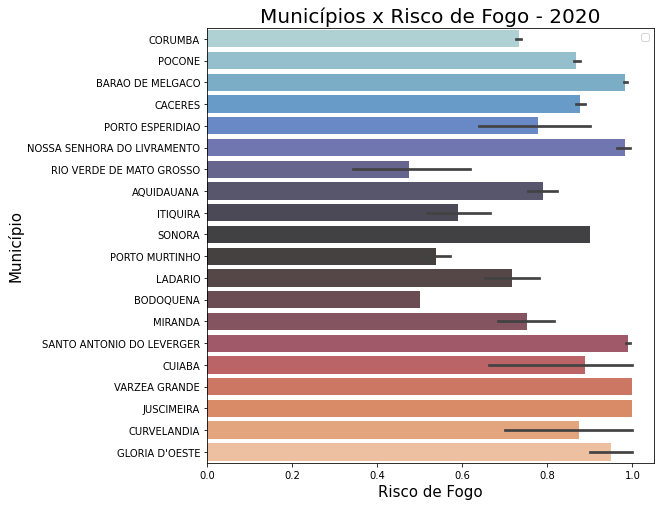

In [ ]:
# Gráfico de barras do Risco de Fogo por Município no ano de 2020

plt.figure(figsize = (8, 8))

ax = sns.barplot(x = df['riscofogo'], y = df['municipio'], palette = "icefire", alpha = 0.85)

plt.title("Municípios x Risco de Fogo - 2020", fontsize = 20)
plt.xlabel("Risco de Fogo", fontsize = 15)
plt.ylabel("Município", fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10)

**Pode-se observar que os municípios que mais sofrem com os focos de incêndio são Barão de Melgaço, Nossa Senhora do Livramento, Santo Antônio do Leverger, Varzea Grande, Juscimeira e Glória d'Oeste.**

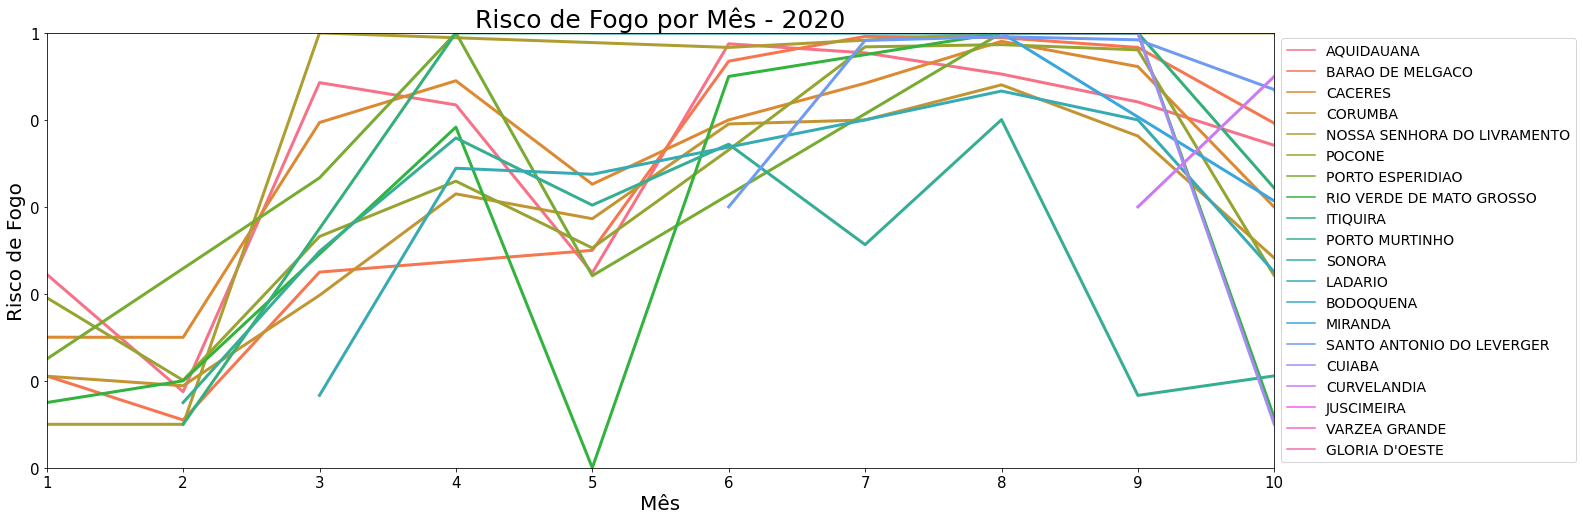

In [ ]:
# Gráfico de linhas do Risco de Fogo por Mês (de acordo com cada município) no ano de 2020

plt.figure(figsize=(22,8))
sns.color_palette("Paired")
ax = sns.lineplot(x = 'mês', y = 'riscofogo', data = mes_fix, hue = 'municipio', estimator = 'sum', lw = 3, err_style = None)

plt.title('Risco de Fogo por Mês - 2020', fontsize = 25)
plt.xlabel('Mês', fontsize = 20)
plt.ylabel('Risco de Fogo', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlim(1, 10)
ax.set_ylim(0.0, 1.0)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

**Percebe-se que, a partir do mês de fevereiro, houve uma alta no índice de risco de fogo que permaneceu em crescimento até meados do mês de setembro.**

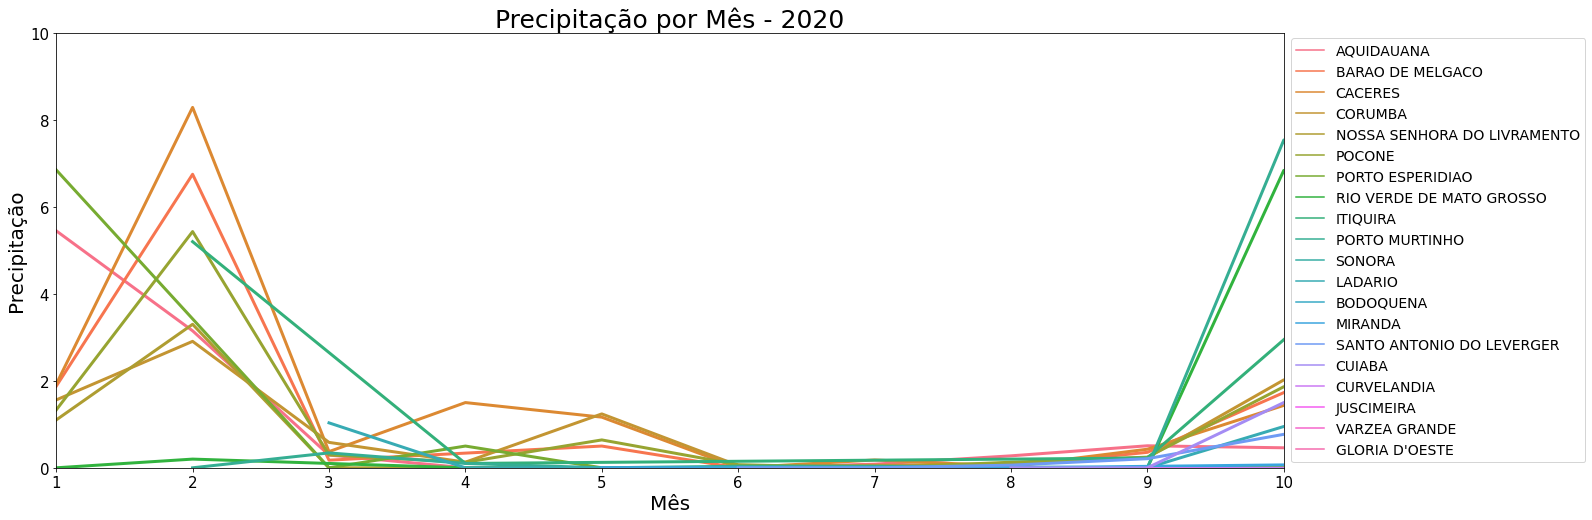

In [ ]:
# Gráfico de linhas da Precipitação por Mês (de acordo com cada município) no ano de 2020

plt.figure(figsize=(22,8))
sns.color_palette("Paired")
ax = sns.lineplot(x = 'mês', y = 'precipitacao', data = mes_fix, hue = 'municipio', estimator = 'sum', lw = 3, err_style = None)

plt.title('Precipitação por Mês - 2020', fontsize = 25)
plt.xlabel('Mês', fontsize = 20)
plt.ylabel('Precipitação', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlim(1, 10)
ax.set_ylim(0, 10)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

**Em comparação ao risco de fogo, nota-se a queda da precipitação na região, que também teve início no mês de fevereiro, permanecendo praticamente sem chuva de março até setembro.**

In [ ]:
# Instalando geopandas
!pip install --upgrade geopandas

     |████████████████████████████████| 972kB 8.5MB/s 
     |████████████████████████████████| 14.8MB 293kB/s 
     |████████████████████████████████| 6.5MB 42.1MB/s 


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



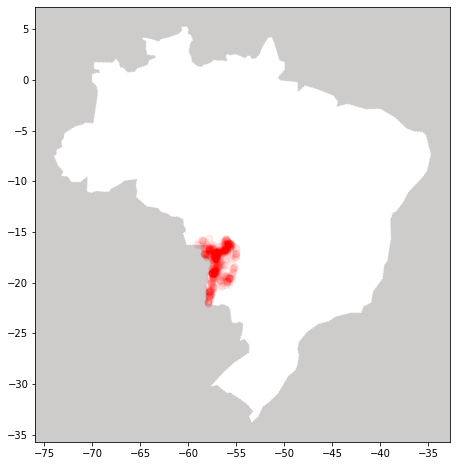

In [ ]:
import plotly.express as px
import geopandas as gpd

# Referencial geográfico dos focos de incêndio (Latitude x Longitude)

data_municipio_gpd = gpd.GeoDataFrame(data_municipio, geometry=gpd.points_from_xy(data_municipio['longitude'], data_municipio['latitude']))
data_municipio_gpd.crs={'init':'epsg:4326'}

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin([ 'South America'])]
americas=americas.loc[americas['name']=='Brazil']

ax = americas.plot(figsize=(8,8), color='white', linestyle=':', edgecolor='white')
ax.set_facecolor('#CECBCB')
data_municipio_gpd.plot(ax=ax, markersize=50,color='red', alpha=0.025)

In [ ]:
# upload do shapefile do estados Mato Grosso e Mato Grosso do Sul
# Obtido em ftp://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/

uploaded = files.upload()
uploaded = files.upload()

Saving 51MUE250GC_SIR.cpg to 51MUE250GC_SIR.cpg
Saving 51MUE250GC_SIR.dbf to 51MUE250GC_SIR.dbf
Saving 51MUE250GC_SIR.prj to 51MUE250GC_SIR.prj
Saving 51MUE250GC_SIR.shp to 51MUE250GC_SIR.shp
Saving 51MUE250GC_SIR.shx to 51MUE250GC_SIR.shx


Saving 50MUE250GC_SIR.cpg to 50MUE250GC_SIR.cpg
Saving 50MUE250GC_SIR.dbf to 50MUE250GC_SIR.dbf
Saving 50MUE250GC_SIR.prj to 50MUE250GC_SIR.prj
Saving 50MUE250GC_SIR.shp to 50MUE250GC_SIR.shp
Saving 50MUE250GC_SIR.shx to 50MUE250GC_SIR.shx


Text(0.5, 1.0, 'Mapa do Estado de Mato Grosso do Sul')

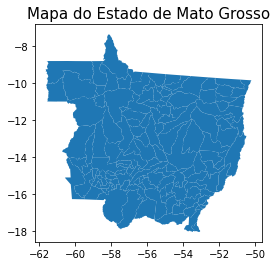

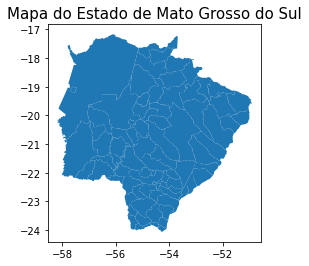

In [ ]:
# Mapas dos Estados de Mato Grosso e Mato Grosso do Sul (Municípios)

MT = gpd.read_file('51MUE250GC_SIR.shp')
MS = gpd.read_file('50MUE250GC_SIR.shp')

MT.plot()
plt.title('Mapa do Estado de Mato Grosso', fontsize = 15)
MS.plot()
plt.title('Mapa do Estado de Mato Grosso do Sul', fontsize = 15)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Text(0.5, 1.0, 'Principais Focos de Incêndio que Atingem o Estado de Mato Grosso do Sul')

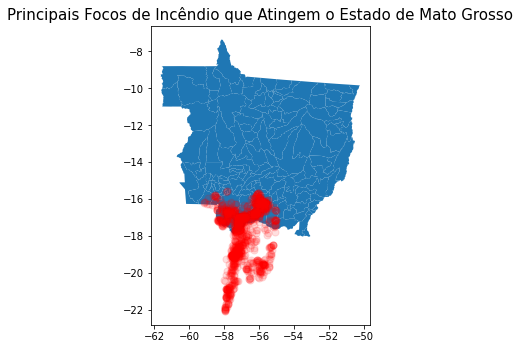

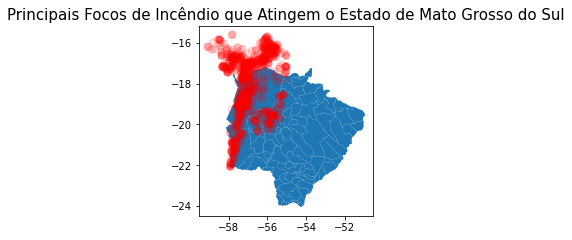

In [ ]:
# Referencial geográfico dos focos de incêndio por estado (Latitude x Longitude)

data_municipio_gpd = gpd.GeoDataFrame(data_municipio, geometry=gpd.points_from_xy(data_municipio['longitude'], data_municipio['latitude']))
data_municipio_gpd.crs={'init':'epsg:4326'}

ax = MT.plot(figsize=(5.5,5.5)) #edgecolor='white para destacar as fronteiras'
data_municipio_gpd.plot(ax=ax, markersize=50,color='red', alpha=0.125)
plt.title('Principais Focos de Incêndio que Atingem o Estado de Mato Grosso', fontsize = 15)

ax = MS.plot(figsize=(3.5,3.5)) #edgecolor='white para destacar as fronteiras'
data_municipio_gpd.plot(ax=ax, markersize=50,color='red', alpha=0.125)
plt.title('Principais Focos de Incêndio que Atingem o Estado de Mato Grosso do Sul', fontsize = 15)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Text(0.5, 1.0, 'Principais Focos de Incêndio que Atingem o Estado de Mato Grosso do Sul')

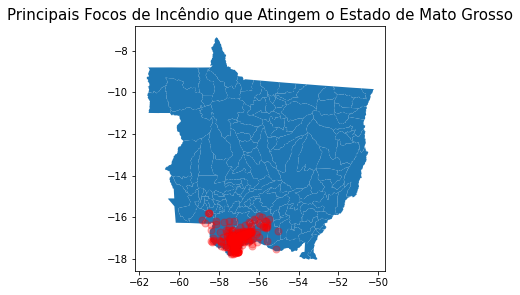

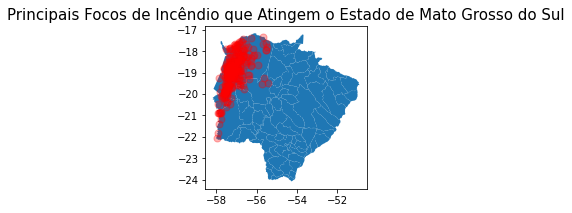

In [ ]:
# Corrigindo o posicionamento dos dados geográficos

foco_MT_gpd = gpd.GeoDataFrame(foco_MT, geometry=gpd.points_from_xy(foco_MT['longitude'], foco_MT['latitude']))
foco_MT_gpd.crs={'init':'epsg:4326'}

ax = MT.plot(figsize=(4.5,4.5))
foco_MT_gpd.plot(ax=ax, markersize=50,color='red', alpha=0.3)
plt.title('Principais Focos de Incêndio que Atingem o Estado de Mato Grosso', fontsize = 15)

foco_MS_gpd = gpd.GeoDataFrame(foco_MS, geometry=gpd.points_from_xy(foco_MS['longitude'], foco_MS['latitude']))
foco_MS_gpd.crs={'init':'epsg:4326'}

ax = MS.plot(figsize=(3,3))
foco_MS_gpd.plot(ax=ax, markersize=50,color='red', alpha=0.3)
plt.title('Principais Focos de Incêndio que Atingem o Estado de Mato Grosso do Sul', fontsize = 15)

**Através dos gráficos acima, podemos perceber que as regiões mais atingidas são o Centro-Sul e Sudeste Mato-Grossense, no Alto Pantanal e parte de Rondonópolis (MT) e os Pantanais de Mato Grosso do Sul, no Baixo Pantanal e parte de Aquidauana (MS).** 

**Grande parte das áreas atingidas são zonas fronteiriças entre Brasil, Bolívia e Paraguai.**